In [1]:
import findspark
findspark.init()
import pyspark
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
spark = pyspark.sql.SparkSession.builder.appName('LinearRegressiom').getOrCreate()

In [4]:
data = spark.read.csv('data/regression.txt', header=False, inferSchema=True)
data = data.withColumnRenamed('_c0', 'X').withColumnRenamed('_c1','Y')
data.show(5)

+-----+-----+
|    X|    Y|
+-----+-----+
|-1.74| 1.66|
| 1.24|-1.18|
| 0.29| -0.4|
|-0.13| 0.09|
|-0.39| 0.38|
+-----+-----+
only showing top 5 rows



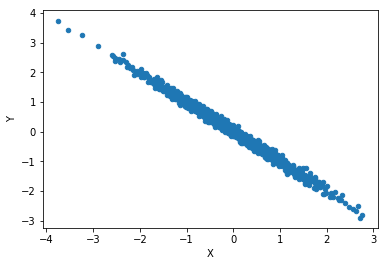

In [5]:
pddata = data.toPandas()
pddata.plot.scatter('X', 'Y')

In [6]:
(train, test) = data.randomSplit([0.7, 0.3])

In [7]:
lr = LinearRegression(featuresCol='feature', labelCol='Y', maxIter=20,
                     regParam=0.3, elasticNetParam=0.8)

In [8]:
vecAssembler = VectorAssembler(inputCols=['X'], outputCol='feature')
train = vecAssembler.transform(train)
test = vecAssembler.transform(test)

In [9]:
model = lr.fit(train)

In [10]:
predictions = model.transform(test)

In [11]:
predictions.show(10)

+-----+----+-------+------------------+
|    X|   Y|feature|        prediction|
+-----+----+-------+------------------+
|-3.74|3.75|[-3.74]|2.6642564151168773|
|-3.23|3.26|[-3.23]|2.3017241982462697|
| -2.6|2.58| [-2.6]|1.8538902832884605|
|-2.54|2.39|[-2.54]|1.8112394342448597|
|-2.14|2.09|[-2.14]| 1.526900440620854|
|-2.09|1.97|[-2.09]|1.4913580664178532|
|-2.07|2.04|[-2.07]|1.4771411167366528|
|-1.88|1.89|[-1.88]|  1.34208009476525|
|-1.83|1.68|[-1.83]|1.3065377205622495|
|-1.82|1.85|[-1.82]|1.2994292457216494|
+-----+----+-------+------------------+
only showing top 10 rows



In [12]:
pddata = predictions.select('Y', 'prediction').toPandas()

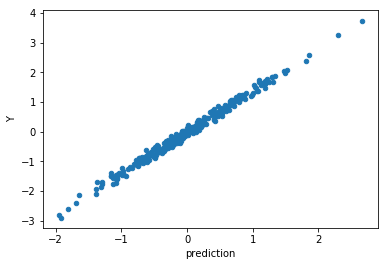

In [13]:
pddata.plot.scatter('prediction', 'Y')

In [14]:
spark.stop()